**Proyecto Modulo #2**

Alondra Estefania Barajas Esparza

Pablo Crowley Mora

## "Análisis de datos financieros en empresas relacionadas con la construcción."

###### > Las empresas de construcción son muy importantes en nuestro entorno, dado que a donde se mire se encontrará una estructura o un edificio que, como fruto de las empresas dedicadas a la construcción, que en este caso analizaremos 4 empresas que estén en el ámbito de la construcción.
###### Empresas a analizar en este caso, todas son empresas que operan en Mexico.
- **Desarrolladora Homex**
- **Grupo Carso, SAB de CV**
- **CEMEX, SAB de CV**
- **Infraestructura Energética Nova, SAB de CV**
###### Por eso con este proyecto daremos a conocer si algunas empresas que se encuentran en la bolsa de valores son susceptibles como punto de inversión.

## Objetivos


##### 1.1 Objetivo general 

> - El proyecto se tratará de un análisis de precio umbral, de algunas empresas en Yahoo! finance, que tengan que ver con la construcción y sus derivados, analizar el precio de acción conforme lo años, y analizar con Montecarlo alguno de los años, para poder apreciar si tendríamos una oportunidad de inversión y hacer análisis de si la probabilidad es buena o no. en cuanto a valores reales.


##### 1.2 Objetivos específicos 

> - Predecir la evolución de los precios de la acción del 2019, y compararlos con los valores reales (se importara los datos desde 2013 hasta 2018 para poder evaluar sus respectivos comportamientos).
> - Obtener las probabilidades del 2019, deseando un aumento del precio umbral del 10% del precio de la acción.
> - Realizar comparaciones y Análisis de lo que dicen nuestras probabilidades, contra la realidad.

#### 1.3 Modelo que representa el problema.

> - En la actualidad Python ha acumulado mucho interés recientemente como una opción de lenguaje para el análisis de datos.

> - En este proyecto aplicaremos manejo de datos con la ayuda de pandas, con finalidad de tener una correcta manipulación de estos y hacerlo de forma remota desde Yahoo Finance.
> - Utilizaremos pandas_datareader, posteriormente importaremos los datos 
> -Una vez que se obtienen los datos, dispondremos a ponerlos de manera gráfica para tener una idea más clara, con la finalidad de operar con ellos. 
> -Usos de la simulación Montecarlo para simulación de escenarios, con la finalidad de obtener probabilidades y con esto tomar decisiones.

> - Los precios diarios de cierro ajustados no son un proceso estocástico, pero si los rendimientos diarios, por lo cual procedemos a calcularlos. A partir de los precios de cierre.

> - En cuanto a la distribución normal tenemos que:


En estadística y probabilidad se llama distribución normal, distribución de Gauss, distribución gaussiana o distribución de Laplace-Gauss, a una de las distribuciones de probabilidad de variable continua que con más frecuencia aparece en estadística y en la teoría de probabilidades.


> - Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el cambio porcentual

$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}\approx \ln\left(\frac{S_t}{S_{t-1}}\right)=r_t.
$$
para $t=1,\ldots,n$.

> - Una vez calculados los rendimeintos se calculan precios de cierre.

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$, donde $p_{-1}$ es el último precio reportado en el año deseado.


In [2]:
#Primero Importamos las librerias.
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Nuestra funcion para poder bajar datos de Yahoo! finance.
def get_closes(names, start_date, end_date):
    closes = web.DataReader(name=names,
                           data_source="yahoo",
                           start=start_date,
                           end=end_date)
    return closes['Adj Close']

In [4]:
# Precios
names = ['HOMEX.MX','GCARSOA1.MX','CEMEXCPO.MX','IENOVA.MX']
start, end = '2013-01-01', '2018-12-31'
closes = get_closes(names=names, start_date=start, end_date=end)

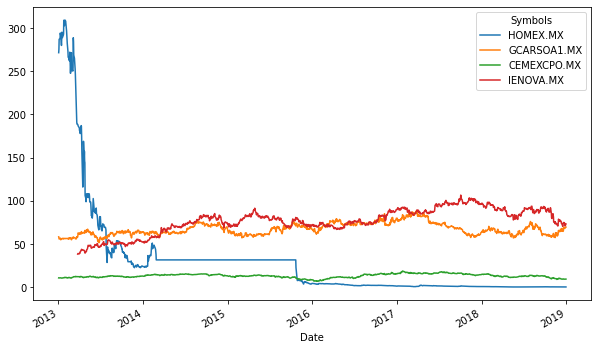

In [5]:
closes.plot(figsize=(10,6));

**- Ahora se procederá a calcular rendimientos porcentuales diarios de los 4 activos junto con sus características estadísticas y a su respectiva graficación.**

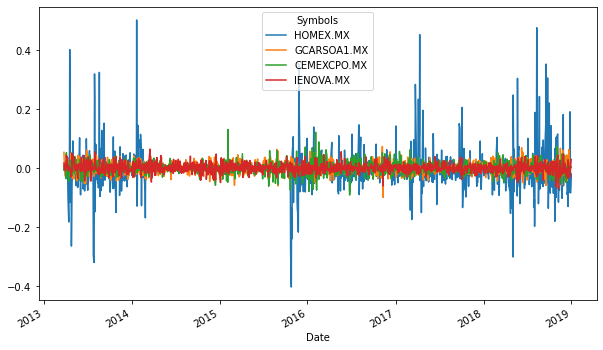

In [6]:
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [7]:
# Calculamos media y desviación estándar modo de hacerlo donde:
#Mu es la media
#Std la desviación estandar

#mu_HOMEX = ret.mean()['HOMEX.MX']
#sigma_HOMEX = ret.std()['HOMEX.MX']

#mu_HOMEX,sigma_HOMEX

In [8]:

mu_HOMEX, mu_GCARSOA1, mu_CEMEXCPO, mu_IENOVA = ret.mean()['HOMEX.MX'], ret.mean()['GCARSOA1.MX'], ret.mean()['CEMEXCPO.MX'],  ret.mean()['IENOVA.MX']
std_HOMEX, std_GCARSOA1, std_CEMEXCPO, std_IENOVA = ret.std()['HOMEX.MX'], ret.std()['GCARSOA1.MX'], ret.std()['CEMEXCPO.MX'], ret.std()['IENOVA.MX']

mu_HOMEX, mu_GCARSOA1, mu_CEMEXCPO, mu_IENOVA, std_HOMEX, std_GCARSOA1, std_CEMEXCPO, std_IENOVA

(-0.0031862673015005277,
 0.0003009465407796311,
 7.779725179102887e-06,
 0.0005678361443321252,
 0.05995698802712856,
 0.018767897430589466,
 0.019503661034010623,
 0.015444367373867127)

**> Ahora simularemos 1000 escenarios de rendimientos diarios para el año 2019 para cada empresa, para despues encontrar sus respectivos precios al cierre, y graficaquemos los precios simulados por empresa.**

In [9]:
# Funcion a utilizar:
def ret_sim(mu,sigma,ndays,nscen,start_date):
    dates = pd.date_range(start = start_date,periods=ndays)
    rend_sim = sigma*np.random.randn(ndays,nscen) + mu
    return pd.DataFrame(index = dates, data = rend_sim)

In [10]:
# Definicíon de parametros:
simret_HOMEX = ret_sim(mu_HOMEX, std_HOMEX, 365, 1000, '2019-01-01')
simret_GCARSOA1 = ret_sim(mu_GCARSOA1 ,std_GCARSOA1 , 365, 1000, '2019-01-01')
simret_CEMEXCPO = ret_sim(mu_CEMEXCPO,std_CEMEXCPO, 365, 1000, '2019-01-01')
simret_IENOVA = ret_sim(mu_IENOVA ,std_IENOVA , 365, 1000, '2019-01-01')

In [11]:
# la definición de los precios de cierre
simcloses_HOMEX = closes.iloc[-1]['HOMEX.MX']*((1+simret_HOMEX).cumprod())

In [12]:
simcloses_GCARSOA1 = closes.iloc[-1]['GCARSOA1.MX']*((1+simret_GCARSOA1).cumprod())

In [13]:
simcloses_CEMEXCPO = closes.iloc[-1]['CEMEXCPO.MX']*((1+simret_CEMEXCPO).cumprod())

In [14]:
simcloses_IENOVA = closes.iloc[-1]['IENOVA.MX']*((1+simret_IENOVA).cumprod())

In [ ]:
# La graficación:
simcloses_HOMEX.plot(figsize=(10,8),legend=False);

In [ ]:
# La graficación:
simcloses_GCARSOA1.plot(figsize=(10,8),legend=False);

In [ ]:
# La graficación:
simcloses_CEMEXCPO.plot(figsize=(10,8),legend=False);

In [ ]:
# La graficación:
simcloses_IENOVA.plot(figsize=(10,8),legend=False);

**> Ahora bien se calculará las probabilidades de que el ultimo precio de nuestra acción sea 15%.**

In [ ]:
# Probabilidad de Desarrolladora Homex, SAB de CV de aumentar un 15% el valor de su acción.
K_HOMEX = (1+0.15)*closes.iloc[-1]['HOMEX.MX']
DF = simcloses_HOMEX>K_HOMEX
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

In [ ]:
# Precio objetivo:
K_HOMEX

In [ ]:
 # Probabilidad de Grupo Carso, SAB de CV de aumentar un 15% el valor de su acción.
K_GCARSOA1= (1+0.15)*closes.iloc[-1]['GCARSOA1.MX']
DF = simcloses_GCARSOA1>K_GCARSOA1
prob = pd.DataFrame(DF.sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

In [ ]:
# Precio objetivo:
K_GCARSOA1